This AugmentedAndSimplifiedImageTrainConvnetDogsCats originally based on Chollet p139 Jupyter Python Notebook is stored in my home dir tensorFlow/mlenv.  The original from Chollet only achieved 70% accuracy for me, so I am going to try to simplify the augmentation as in the KerasBlog one which achieved 80%

The original data from Kaggle is at mlenv/kaggle_original_data/dogs_vs_cats, while the following script moves the image files into training, validation and test directories and keeping dog and cat images separate.  This is in preparation to create the tensors to input to keras fit ML convnet!

Usage notes:
dogs_vs_cats dir at /home/sbradley/tensorflow/mlenv/chollet_book/dogs_vs_cats cannot exist because of the mkdir...

In [27]:
import os, shutil

original_dataset_dir = '/home/sbradley/tensorflow/mlenv/kaggle_original_data/dogs_vs_cats/train'
base_dir = '/home/sbradley/tensorflow/mlenv/chollet_book/dogs_vs_cats'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)


train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src,dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src,dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src,dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src,dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src,dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src,dst)

In [28]:
print('total training cat images: ', len(os.listdir(train_cats_dir)))
print('total training dog images: ', len(os.listdir(train_dogs_dir)))

print('total validation cat images: ', len(os.listdir(validation_cats_dir)))
print('total validation dog images: ', len(os.listdir(validation_cats_dir)))

print('total test cat images: ', len(os.listdir(test_cats_dir)))
print('total test dog images: ', len(os.listdir(test_dogs_dir)))




total training cat images:  1000
total training dog images:  1000
total validation cat images:  500
total validation dog images:  500
total test cat images:  500
total test dog images:  500


Below it is evident that the tools for learning the images or fitting the data come from keras.  While for this example, the data is from  keras.



In [34]:
from keras import layers
from keras import models
model = models.Sequential()

#(3,3) below is likely the size of the conv  sliding "window":
model.add(layers.Conv2D(32, (3,3), activation='relu',
         input_shape=(150,150,3)))
#find the max value in each 2 x 2 square?:
model.add(layers.MaxPooling2D((2,2)))

# Do caps indicate that each of the "add" parameters 
# are constructed objects and/or functional objects of type Conv2D etc)?
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))  # it may work better to do the dropout after the Dense...
model.add(layers.Dense(512,activation='relu'))
#end with Dense of 1--final decision is binary, 0 or 1 for dog or cat.
model.add(layers.Dense(1,activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [35]:
from keras import optimizers
model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

from keras.preprocessing.image import ImageDataGenerator

# Lots of new augmentation options provided here!
''' original achieved only 70%
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip=True,
    fill_mode='nearest')
    '''
    
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip=True,
    )

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),  
            # batch_size 32 may be an error in book -- 2000 images so need to use 100 x batch size of 20
        # with batch_size 32 here and in validation _generator below, I only got .72 accuracy vs Chollet .85
        # keras example show 32, but they don't show the directory size...  If bigger batches are statistically better, then
        # then maybe we need more images or can rotated ones be re-used--likely will just pull a rotated one for every value,
        # so 32 should be ok here--just values aren't as independent--they are inter-correlated a bit.
        # train_generator,
        # steps_per_epoch=100
    batch_size=32,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
        # batch_size 32 may be an error in book -- only 1000 images in my validation data file so need to use 50 x batch size of 20 = 1000 
        # and 32 as in book resulted in sub-par results.  So here 20 makes sense
    batch_size=20,
    class_mode='binary')

for data_batch, labels_batch in train_generator:
    print('data batch shape: ', data_batch.shape)
    print('labels batch shape: ', labels_batch.shape)
    print('labels : ', labels_batch)
    break

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
data batch shape:  (32, 150, 150, 3)
labels batch shape:  (32,)
labels :  [0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1.]


In [36]:
batch_size = 20

history = model.fit_generator(
    train_generator,
    steps_per_epoch=2000//batch_size,  # keras example uses 2000 here--re-using all 2000 images for each epoch!
    epochs=100,   # "Augmented" from 30 to 100 epochs!! 
                # These are iterations through augmented training data no repeats!--3,000 gradient steps/epoch?
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/100
100/100 [==============================] - 244s 2s/step - loss: 0.6839 - acc: 0.5406 - val_loss: 0.6564 - val_acc: 0.5890
Epoch 2/100
100/100 [==============================] - 240s 2s/step - loss: 0.6591 - acc: 0.5944 - val_loss: 0.6449 - val_acc: 0.6030
Epoch 3/100
100/100 [==============================] - 241s 2s/step - loss: 0.6388 - acc: 0.6300 - val_loss: 0.6122 - val_acc: 0.6560
Epoch 4/100
100/100 [==============================] - 239s 2s/step - loss: 0.5983 - acc: 0.6766 - val_loss: 0.5971 - val_acc: 0.6700
Epoch 5/100
100/100 [==============================] - 237s 2s/step - loss: 0.5715 - acc: 0.7016 - val_loss: 0.5992 - val_acc: 0.6710
Epoch 6/100
100/100 [==============================] - 240s 2s/step - loss: 0.5603 - acc: 0.7078 - val_loss: 0.6008 - val_acc: 0.6710
Epoch 7/100
100/100 [==============================] - 237s 2s/step - loss: 0.5410 - acc: 0.7234 - val_loss: 0.5557 - val_acc: 0.7010
Epoch 8/100
100/100 [==============================] - 241s 2s

Epoch 62/100
100/100 [==============================] - 237s 2s/step - loss: 0.1851 - acc: 0.9219 - val_loss: 0.5699 - val_acc: 0.7890
Epoch 63/100
100/100 [==============================] - 261s 3s/step - loss: 0.1876 - acc: 0.9237 - val_loss: 0.6554 - val_acc: 0.8050
Epoch 64/100
100/100 [==============================] - 263s 3s/step - loss: 0.1798 - acc: 0.9322 - val_loss: 0.5697 - val_acc: 0.8080
Epoch 65/100
100/100 [==============================] - 256s 3s/step - loss: 0.1831 - acc: 0.9250 - val_loss: 0.5228 - val_acc: 0.8120
Epoch 66/100
100/100 [==============================] - 240s 2s/step - loss: 0.1748 - acc: 0.9275 - val_loss: 0.5337 - val_acc: 0.8110
Epoch 67/100
100/100 [==============================] - 241s 2s/step - loss: 0.1885 - acc: 0.9275 - val_loss: 0.4982 - val_acc: 0.8010
Epoch 68/100
100/100 [==============================] - 243s 2s/step - loss: 0.1666 - acc: 0.9338 - val_loss: 0.5269 - val_acc: 0.8140
Epoch 69/100
100/100 [==============================] -

In [37]:
model.save('cats_dogs_augmntd_zoom_shear_hflip_dropout_still_bef_dense_4.h5')

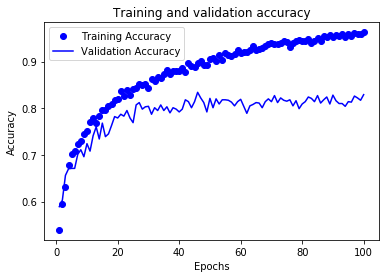

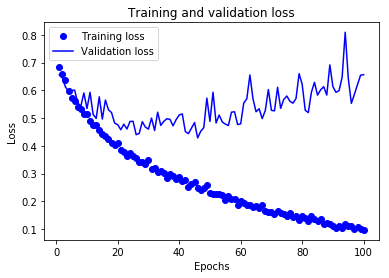

In [38]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
training_loss = history.history['loss']
#print("training_loss: ", training_loss) 
validation_loss = history.history['val_loss']
#print("validation_loss: ", validation_loss) 

epochs = range(1,len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, training_loss, 'bo', label='Training loss')
plt.plot(epochs, validation_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Wow upgraded this training accuracy from .70 to about .8 by simply reducing the types of degrees of freedom in the augmentation to only zoom, skew and flip horiz.  It seems like rotation_range, width and height shift and fill_mode didn't help me gain much of any accuracy.  However, the fit did much better on overfit with all of the degrees of freedom !!  No overfit before and now lots

original augmentation types and ranges:
    rotation_range=40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip=True,
    fill_mode='nearest'

For this augmented training data, we achieved 0.70 Accuracy and there was no overfitting.  However this accuracy is essentially the same as without augmentation.   The overfitting shows that the augmented images are indeed always different.  But it doesn't really learn much new from the augmented data here...   I added fill_mode='nearest' for my third try at this, but still I am not seeing as good of aresults as in Chollet--odd.  It probably improved to .74 at its highest.  It also seems to be highly volatile, especially the validation loss.
This noisy validation may be due to only 20 values per batch on this batch_size=20, vs 32 for training.
